In [ ]:
# Natural Language Processing  - tet data in form of documents (txt,pdf,dox,etc)
#webpages,social media , text database etc
# Text Data is unsupervised learning data no structure .
# Vector database where text data lies

#Biggest challenge in big data is cleaning and preprocessing . Remove the digits ,punctuations,special characters,white spaces , emojis,hyper links ,images,text

# regular expression pattern must be know for cleaning text ,Must of these patterns are predefined

# Post preprocessing text must be converted into matrix of numbers
# Vectorization . Only when converted to numbers Algorithms can be built

# Model Building using ML Models like Regressions,Classification,Clustering,
# Deep Learning Models Neural Networks like (LSTM,GPT )Models [Transformers or Encoders/Decoders]

# NLP Used Cases - Senntiment Analysis , Text Summarization , Auto_Filling ,Chatbots
# Reviews Anaysis , (Q & A Models) Generative AI  (Prompt Engineering) ,Scraping/Extract etc

# Core Library in nltk (Natural Language tool kit) other Libraries are " Textblob, Spacy , wordcloud,re,string,bs4" ,etc

In [ ]:

import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy  as np
import seaborn as sns
#from nltk.tokenize import word_tokenize

import nltk
import re
import requests

In [ ]:
# Web Scraping - Scraping or extract text from webpages or using urls
# only open source web ;pages can be scrapped

#web pages use html based lenguage and html scrapers must be used

In [ ]:
climatewiki=requests.get("https://en.wikipedia.org/wiki/Climate_change")

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
climatedf=BeautifulSoup(climatewiki.content,"lxml")

#lxml is open source html format used at wikipedia
#other html format are html5lib

In [ ]:
climatetxt=climatedf.getText(strip=True)

In [ ]:
climatetxt

'Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Terminology2Global temperature riseToggle Global temperature rise subsection2.1Temperatures prior to present-day global warming2.2Warming since the Industrial Revolution2.2.1Differences by region2.3Future global temperatures3Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection3.1Greenhouse gases3.2Land surface changes3.3Other factors3.3.1Aerosols and clouds3.3.2Solar and volcanic activity3.3.3Climate change feedbacks4Modelling5ImpactsToggle Impacts subsection5.1Environmental effects5.2Tipping points and long-term impacts5.3Nature and wildlife5.4

In [ ]:
climatetxt # Preprocessing must be done for removing punctuations,digits, Special Charcaters,stopwords(is,an the),etc.

'Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Terminology2Global temperature riseToggle Global temperature rise subsection2.1Temperatures prior to present-day global warming2.2Warming since the Industrial Revolution2.2.1Differences by region2.3Future global temperatures3Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection3.1Greenhouse gases3.2Land surface changes3.3Other factors3.3.1Aerosols and clouds3.3.2Solar and volcanic activity3.3.3Climate change feedbacks4Modelling5ImpactsToggle Impacts subsection5.1Environmental effects5.2Tipping points and long-term impacts5.3Nature and wildlife5.4

In [ ]:
#re Library or regular expression librarry is crucial for preprocessing  re.sub(),re.split(),re.replace() etc functions predefined for text data
# Replace footnote references with space

In [ ]:
climatetxt=re.sub(r'\[d+\]'," ",climatetxt)
#  Replace footnote references with space
# \d+ is regex pattern for digits

In [ ]:
#Replace numbers in () or 2024 with space
climatetxt=re.sub(r'\(d+\)'," ",climatetxt)

In [ ]:
#Replace words  in [and] or 2024 with space
#\w+ is regex pattern for words
climatetxt=re.sub(r'\[w+\]'," ",climatetxt)

In [ ]:
climatetxt=re.sub(r'\(w+\)'," ",climatetxt)
#Replace words () with space

In [ ]:
# Remove Special Characters
climatetxt=re.sub('[\(\[].*?[\)\]]'," ",climatetxt)

In [ ]:
climatetxt=re.sub("\'s"," ",climatetxt)

In [ ]:
climatetxt=re.sub("\xa02021"," ",climatetxt)

In [ ]:
climatetxt=re.sub("[0-9]+"," ",climatetxt)
climatetxt

'Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide  Terminology Global temperature riseToggle Global temperature rise subsection . Temperatures prior to present-day global warming . Warming since the Industrial Revolution . . Differences by region . Future global temperatures Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection . Greenhouse gases . Land surface changes . Other factors . . Aerosols and clouds . . Solar and volcanic activity . . Climate change feedbacks Modelling ImpactsToggle Impacts subsection . Environmental effects . Tipping points and long-term impacts . Nature and wildlife . Huma

In [ ]:
# Tokenization - Breaking text/content into either sentences or words
#sentence Tokenization - breaking content into sentences delimiter is fullstop
# Word Tokenization - Breaking content into words delimiter is space

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
climate_sentences=sent_tokenize(climatetxt)

In [ ]:
climate_sentences=pd.DataFrame(climate_sentences,columns=["sentences"])


In [ ]:
climate_sentences.head(2)

,sentences
0,Climate change - WikipediaJump to contentMain ...
1,Temperatures prior to present-day global warmi...


In [ ]:
#Sentiment Analysis is done using Library "Textblob"
#Text Blob based sentiment analysis generates 2 metrics
#1) Polarity Score is  a float between -1 to 1 .Polarity is calculated by # Comparing with lexicons /lists of +ve ,-ve words ,
# > 0 is +ve , =0 is Neutral  & < 0 is -ve
#2 ) Subjectivity lies between 0 and  1 Close to 1 indicates high personal
#opinion without factual information an close to 0 indicates low personal
#opinion with factual information

In [ ]:
from textblob import TextBlob

In [ ]:
s1=TextBlob("Pranav is greatest player Cricket")
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [ ]:
s1=TextBlob("Pranav is greatest playing Cricket who has most runs")
s1.sentiment

Sentiment(polarity=0.75, subjectivity=0.75)

In [ ]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
climate_sentences['sentiment']=[str(analyze_sentiment(x))
                            for x in climate_sentences.sentences]

In [ ]:
climate_sentences['sentiment'].value_counts()

,count
sentiment,
Neutral,1682
Positive,403
Negative,194


In [ ]:
# Object Data or Non Numeric Data - Dummy Encoding has to done
# Dummy Encoding must be done on all object and categorical data  # pg.get_dumies() function for dummy encoding
# Gender - Male,Female,Male,Female,Female,Male
# Gender_Male = True,False,True,False,False,True
#Gender_Female = False,True,False,True,True,False
# Original Variable column will be replace with dummy encoded columns

In [ ]:
#NLP Words or Token are used for Analysis
#from nltk.tokenize import word_tokenize
Climatewords=word_tokenize(climatetxt)

In [ ]:
Climatewords

['Climate',
 'change',
 '-',
 'WikipediaJump',
 'to',
 'contentMain',
 'menuMain',
 'menumove',
 'to',
 'sidebarhideNavigationMain',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usContributeHelpLearn',
 'to',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonateCreate',
 'accountLog',
 'inPages',
 'for',
 'logged',
 'out',
 'editorslearn',
 'moreContributionsTalkContentsmove',
 'to',
 'sidebarhide',
 'Terminology',
 'Global',
 'temperature',
 'riseToggle',
 'Global',
 'temperature',
 'rise',
 'subsection',
 '.',
 'Temperatures',
 'prior',
 'to',
 'present-day',
 'global',
 'warming',
 '.',
 'Warming',
 'since',
 'the',
 'Industrial',
 'Revolution',
 '.',
 '.',
 'Differences',
 'by',
 'region',
 '.',
 'Future',
 'global',
 'temperatures',
 'Causes',
 'of',
 'recent',
 'global',
 'temperature',
 'riseToggle',
 'Causes',
 'of',
 'recent',
 'global',
 'temperature',
 'r

In [ ]:
Climatewords=[w for w in  Climatewords if w.isalnum()]



In [ ]:
Climatewords

['Climate',
 'change',
 'WikipediaJump',
 'to',
 'contentMain',
 'menuMain',
 'menumove',
 'to',
 'sidebarhideNavigationMain',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usContributeHelpLearn',
 'to',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonateCreate',
 'accountLog',
 'inPages',
 'for',
 'logged',
 'out',
 'editorslearn',
 'moreContributionsTalkContentsmove',
 'to',
 'sidebarhide',
 'Terminology',
 'Global',
 'temperature',
 'riseToggle',
 'Global',
 'temperature',
 'rise',
 'subsection',
 'Temperatures',
 'prior',
 'to',
 'global',
 'warming',
 'Warming',
 'since',
 'the',
 'Industrial',
 'Revolution',
 'Differences',
 'by',
 'region',
 'Future',
 'global',
 'temperatures',
 'Causes',
 'of',
 'recent',
 'global',
 'temperature',
 'riseToggle',
 'Causes',
 'of',
 'recent',
 'global',
 'temperature',
 'rise',
 'subsection',
 'Greenhouse',
 'gases',
 'Land

In [ ]:
Climatewords=[w.lower() for w in Climatewords]
#Convert to lowerCase or Smaller Case

In [ ]:
Climatewords

['climate',
 'change',
 'wikipediajump',
 'to',
 'contentmain',
 'menumain',
 'menumove',
 'to',
 'sidebarhidenavigationmain',
 'pagecontentscurrent',
 'eventsrandom',
 'articleabout',
 'wikipediacontact',
 'uscontributehelplearn',
 'to',
 'editcommunity',
 'portalrecent',
 'changesupload',
 'filesearchsearchappearancedonatecreate',
 'accountlog',
 'inpersonal',
 'toolsdonatecreate',
 'accountlog',
 'inpages',
 'for',
 'logged',
 'out',
 'editorslearn',
 'morecontributionstalkcontentsmove',
 'to',
 'sidebarhide',
 'terminology',
 'global',
 'temperature',
 'risetoggle',
 'global',
 'temperature',
 'rise',
 'subsection',
 'temperatures',
 'prior',
 'to',
 'global',
 'warming',
 'warming',
 'since',
 'the',
 'industrial',
 'revolution',
 'differences',
 'by',
 'region',
 'future',
 'global',
 'temperatures',
 'causes',
 'of',
 'recent',
 'global',
 'temperature',
 'risetoggle',
 'causes',
 'of',
 'recent',
 'global',
 'temperature',
 'rise',
 'subsection',
 'greenhouse',
 'gases',
 'land

In [ ]:
#Remove stopwords . stopwords are is a,an,the, to , then , etc
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
english_stopwords=set(stopwords.words('english'))

In [ ]:
#Remove Stopwords
Climatewords=[w for w in Climatewords if w not in english_stopwords]

In [ ]:
Climatewords

['climate',
 'change',
 'wikipediajump',
 'contentmain',
 'menumain',
 'menumove',
 'sidebarhidenavigationmain',
 'pagecontentscurrent',
 'eventsrandom',
 'articleabout',
 'wikipediacontact',
 'uscontributehelplearn',
 'editcommunity',
 'portalrecent',
 'changesupload',
 'filesearchsearchappearancedonatecreate',
 'accountlog',
 'inpersonal',
 'toolsdonatecreate',
 'accountlog',
 'inpages',
 'logged',
 'editorslearn',
 'morecontributionstalkcontentsmove',
 'sidebarhide',
 'terminology',
 'global',
 'temperature',
 'risetoggle',
 'global',
 'temperature',
 'rise',
 'subsection',
 'temperatures',
 'prior',
 'global',
 'warming',
 'warming',
 'since',
 'industrial',
 'revolution',
 'differences',
 'region',
 'future',
 'global',
 'temperatures',
 'causes',
 'recent',
 'global',
 'temperature',
 'risetoggle',
 'causes',
 'recent',
 'global',
 'temperature',
 'rise',
 'subsection',
 'greenhouse',
 'gases',
 'land',
 'surface',
 'changes',
 'factors',
 'aerosols',
 'clouds',
 'solar',
 'volca

In [ ]:
#Select words with more than 2 Characters
Climatewords=[w for w in Climatewords if len(w)>2]

In [ ]:
from nltk.probability import FreqDist


In [ ]:
wordfreq=FreqDist(Climatewords)

In [ ]:
from wordcloud import WordCloud

In [ ]:
Climate_words=(" ").join(Climatewords)
#Combine Words into Single List

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords="english_stopwords",max_words=250,collocations=False).generate(str(Climate_words))

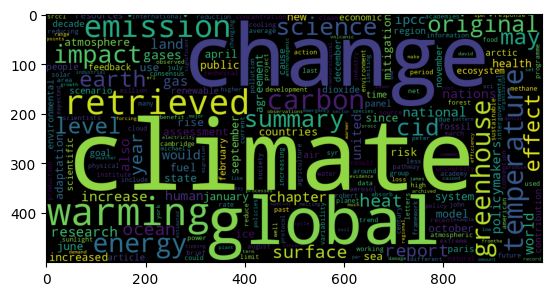

In [ ]:
plt.imshow(wordcloud)
plt.show()

#Displays words based on Frequency . Most Frequency words will have large font
# Size & Small frequent words have small font size

In [ ]:
# Find to replace resub function

In [ ]:
#Post preprocessing words must be converted into a matrix of Numbers
# Vectorization - The process of Converting text into Numbers
# TWO TYPES
#1) Document Term Matrix
# 2) Term Frequency Inverse Document Frequency(TFIDF) Matrix


In [ ]:
# Document Term Matrix (DTM)
# Documents on rows and Terms/Words in Columns
# Doc1 - The Car is driven on road
# Doc2 - The Truck is Driven on Highway
# Doc3 - The Bus is used for Public Transportation

# Post Preprocessing
# D1- Car ,driven , road
# D2- Truck , Driven , Highway
#D3 - Bus , Public , Transportation

 #  Car Driven road truck Highway Bus Public transportation
 # D1- 1, 1 ,1 ,0,0,0,0,0
 # D2- 0,1,0,1,1,0,0,0
#  D3- 0,0,0,0,0,1,1,1,

# Document Term Matrix is a Sparse Matrix , Sparse Matrix will have many Zeros (0's)
# Sklearn.feature_extraction.text import CountVectorization


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
DTM=CountVectorizer(max_features=20,stop_words="english")


In [ ]:
X_DTM=DTM.fit_transform(Climatewords)

# Implementation on Words

In [ ]:
pd.DataFrame(X_DTM.toarray(),columns=DTM.get_feature_names_out()).head(3)

,carbon,change,chapter,cid,climate,earth,emissions,energy,gas,global,greenhouse,heat,impacts,original,report,retrieved,summary,surface,temperature,warming
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
climate_sentences.head(3)

,sentences,sentiment
0,Climate change - WikipediaJump to contentMain ...,Neutral
1,Temperatures prior to present-day global warmi...,Neutral
2,Warming since the Industrial Revolution .,Neutral


In [ ]:

X_DTM_sentences=DTM.fit_transform(climate_sentences)

In [ ]:
pd.DataFrame(X_DTM_sentences.toarray(),columns=DTM.get_feature_names_out()).head()

,sentences,sentiment
0,1,0
1,0,1


In [ ]:
DTM_Bigrams=CountVectorizer(max_features=20,stop_words="english",ngram_range=(2,2))

# ngram_range=(1,1) is for unigrams
# ngram_range=(2,2)is for  Bigrams
# ngram_range=(3,3)is for  Trigrams


In [ ]:
X_Bigrams=DTM_Bigrams.fit_transform(climate_sentences.sentences)

In [ ]:
pd.DataFrame(X_Bigrams.toarray(),columns=DTM_Bigrams.get_feature_names_out()).head(2)

,ar wg,archivedfrom original,carbon brief,carbon dioxide,climate change,et al,global warming,greenhouse gas,greenhouse gases,intergovernmental panel,ipcc ar,ipcc sr,issn cid,panel climate,pmc pmid,sea level,sr ch,summary policymakers,united nations,wg ch
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Bigrams are used in Medical Industries

In [ ]:
# Vectorization - : Term Frequency Inverse Document Matrix

In [ ]:
# TFIDFfor Car
# Term Frequency of Car = 1/3 = 0.33333
# Inverse Documnet Frequency of Car = log(3/1)=log(3)=1.0986
# TFIDF of Car = 0.333*1.0986 = 0.36583380000000004
# TFIDF for driven
# Term Frequency of driven  = 1/3*1/3 = 0.33*0.33=0.1089
# Inverse Documnet Frequency of driven = log(3/2) = 0.4054
# TFIDF of driven = 0.1089*0.4054 = 0.4414

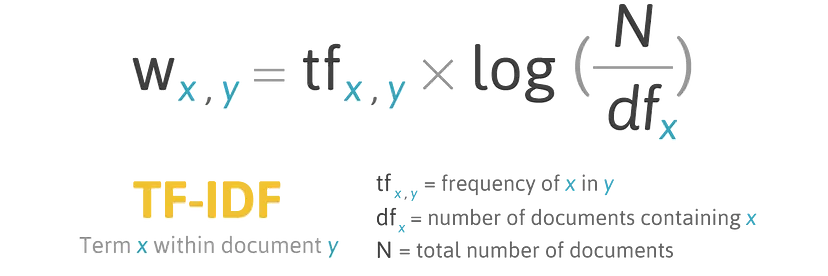

In [ ]:
from IPython.display import Image, display
from io import BytesIO
import requests


image_url = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*V9ac4hLVyms79jl65Ym_Bw.jpeg"
response = requests.get(image_url)
image = Image(data=response.content)

display(image)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Tfidf=TfidfVectorizer(max_features=20,stop_words="english",ngram_range=(2,2))

In [ ]:
X_Tfidf=Tfidf.fit_transform(climate_sentences.sentences)

In [ ]:
pd.DataFrame(X_Tfidf.toarray(),columns=Tfidf.get_feature_names_out()).head()

,ar wg,archivedfrom original,carbon brief,carbon dioxide,climate change,et al,global warming,greenhouse gas,greenhouse gases,intergovernmental panel,ipcc ar,ipcc sr,issn cid,panel climate,pmc pmid,sea level,sr ch,summary policymakers,united nations,wg ch
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(X_Tfidf.toarray(),columns=Tfidf.get_feature_names_out()).head(2)

,ar wg,archivedfrom original,carbon brief,carbon dioxide,climate change,et al,global warming,greenhouse gas,greenhouse gases,intergovernmental panel,ipcc ar,ipcc sr,issn cid,panel climate,pmc pmid,sea level,sr ch,summary policymakers,united nations,wg ch
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
